Notebook này chạy trên local.

# Spaceship Titanic Competition

[Link_to_competition](https://www.kaggle.com/competitions/spaceship-titanic)

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [2]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
with ZipFile('spaceship-titanic.zip') as f:
    f.extractall('data')

In [4]:
import pandas as pd

In [5]:
raw_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sample_sub_df = pd.read_csv('data/sample_submission.csv')

In [6]:
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
raw_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
def view_categoricals_feature(cat_col: str):
    d = dict()    
    total = raw_df[cat_col].value_counts()
    idx = raw_df['Transported'].value_counts().index.tolist()
    for t in idx:
        x = raw_df[raw_df['Transported']==t][cat_col].value_counts()
        d[t] = x/total*100
    
    return pd.DataFrame(data=d, columns=idx)

In [9]:
numeric_cols = []
categorical_cols = []

## Explore the data and preprocessing

### Home Planet

In [10]:
raw_df['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [11]:
raw_df.fillna({'HomePlanet': 'Earth'}, inplace=True)

In [12]:
view_categoricals_feature('HomePlanet')

,True,False
HomePlanet,,
Earth,42.764939,57.235061
Europa,65.884561,34.115439
Mars,52.302445,47.697555


In [13]:
test_df.fillna({'HomePlanet': 'Earth'}, inplace=True)

In [14]:
categorical_cols.append('HomePlanet')

### CryoSleep

In [15]:
raw_df['CryoSleep'].value_counts(dropna=False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [16]:
raw_df.fillna({'CryoSleep': False}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4508\4225016996.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df.fillna({'CryoSleep': False}, inplace=True)


In [17]:
view_categoricals_feature('CryoSleep')

,True,False
CryoSleep,,
False,33.504243,66.495757
True,81.758314,18.241686


In [18]:
test_df.fillna({'CryoSleep': False}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4508\2842738613.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.fillna({'CryoSleep': False}, inplace=True)


In [19]:
categorical_cols.append('CryoSleep')

### Cabin

In [20]:
import numpy as np

In [21]:
raw_df['Deck'] = raw_df['Cabin'].apply(lambda x: x.split('/')[0] if str(x).count('/') > 0 else 'UNK')
raw_df['Side'] = raw_df['Cabin'].apply(lambda x: x.split('/')[2] if str(x).count('/') > 1 else 'UNK')

In [22]:
view_categoricals_feature('Deck')

,True,False
Deck,,
A,49.609375,50.390625
B,73.427471,26.572529
C,68.005355,31.994645
D,43.305439,56.694561
E,35.730594,64.269406
F,43.987115,56.012885
G,51.621727,48.378273
T,20.000000,80.000000
UNK,50.251256,49.748744


In [23]:
test_df['Deck'] = test_df['Cabin'].apply(lambda x: x.split('/')[0] if str(x).count('/') > 0 else 'UNK')
test_df['Side'] = test_df['Cabin'].apply(lambda x: x.split('/')[2] if str(x).count('/') > 1 else 'UNK')

In [24]:
un_importance_deck = ['UNK', 'A', 'G']
raw_df['Deck'] = raw_df['Deck'].apply(lambda x: 'REM' if x in un_importance_deck else x)

In [25]:
test_df['Deck'] = test_df['Deck'].apply(lambda x: 'REM' if x in un_importance_deck else x)

In [26]:
view_categoricals_feature('Deck')

,True,False
Deck,,
B,73.427471,26.572529
C,68.005355,31.994645
D,43.305439,56.694561
E,35.730594,64.269406
F,43.987115,56.012885
REM,51.360319,48.639681
T,20.000000,80.000000


In [27]:
raw_df.drop(columns='Cabin', inplace=True)

In [28]:
categorical_cols += ['Deck', 'Side']

### Destination

In [29]:
raw_df['Destination'].value_counts(dropna=False)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

In [30]:
raw_df.fillna({'Destination': 'TRAPPIST-1e'}, inplace=True)

In [31]:
view_categoricals_feature('Destination')

,True,False
Destination,,
TRAPPIST-1e,47.219944,52.780056
55 Cancri e,61.000000,39.000000
PSO J318.5-22,50.376884,49.623116


In [32]:
test_df.fillna({'Destination': 'TRAPPIST-1e'}, inplace=True)

In [33]:
categorical_cols.append('Destination')

### Vip

In [34]:
raw_df['VIP'].value_counts(dropna=False)

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [35]:
raw_df.fillna({'VIP': False}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4508\2747767893.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df.fillna({'VIP': False}, inplace=True)


In [36]:
view_categoricals_feature('VIP')

,True,False
VIP,,
False,50.647516,49.352484
True,38.190955,61.809045


In [37]:
test_df.fillna({'VIP': False}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4508\238948777.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.fillna({'VIP': False}, inplace=True)


In [38]:
categorical_cols.append('VIP')

### Name

In [39]:
raw_df['FirstName'] = raw_df['Name'].apply(lambda x: x.split(' ')[0] if str(x).find(' ')!=-1 else 'unk')
raw_df['LastName'] = raw_df['Name'].apply(lambda x: x.split(' ')[1] if str(x).find(' ')!=-1 else 'unk')

In [40]:
first_name = raw_df['FirstName'].value_counts()
last_name = raw_df['LastName'].value_counts()

In [41]:
raw_df['HasSameFirstName'] = raw_df['FirstName'].apply(lambda x: 1 if first_name.get(x)>3 else 0)
raw_df['HasSameLastName'] = raw_df['LastName'].apply(lambda x: 1 if last_name.get(x)>3 else 0)

In [42]:
view_categoricals_feature('HasSameLastName')

,True,False
HasSameLastName,,
1,49.440681,50.559319
0,52.855925,47.144075


In [43]:
raw_df.drop(columns=['Name','FirstName','LastName','HasSameFirstName','HasSameLastName'], inplace=True)

### Passenger Id

In [44]:
raw_df['GroupId'] = raw_df['PassengerId'].map(lambda x: x[0:4])

In [45]:
test_df['GroupId'] = test_df['PassengerId'].map(lambda x: x[0:4])

In [46]:
raw_df['GroupId']

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: GroupId, Length: 8693, dtype: object

In [47]:
group_count = raw_df['GroupId'].value_counts()
raw_df['NumInGroup'] = raw_df['GroupId'].apply(lambda x: group_count.get(x))

In [48]:
group_count = test_df['GroupId'].value_counts()
test_df['NumInGroup'] = test_df['GroupId'].apply(lambda x: group_count.get(x))

In [49]:
raw_df.drop(columns=['PassengerId'], inplace=True)

In [50]:
raw_df['EnableWithFamily'] = raw_df['NumInGroup'].apply(lambda x: 'Enable' if x>=2 else 'Unable')

In [51]:
test_df['EnableWithFamily'] = test_df['NumInGroup'].apply(lambda x: 'Enable' if x>=2 else 'Unable')

In [52]:
view_categoricals_feature('EnableWithFamily')

,True,False
EnableWithFamily,,
Enable,56.687243,43.312757
Unable,45.244537,54.755463


In [53]:
raw_df.drop(columns=['GroupId'], inplace=True)

In [54]:
categorical_cols += ['NumInGroup', 'EnableWithFamily']

### Age

In [55]:
raw_df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [56]:
avg_age = raw_df['Age'].mean()
raw_df.fillna({'Age': avg_age}, inplace=True)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

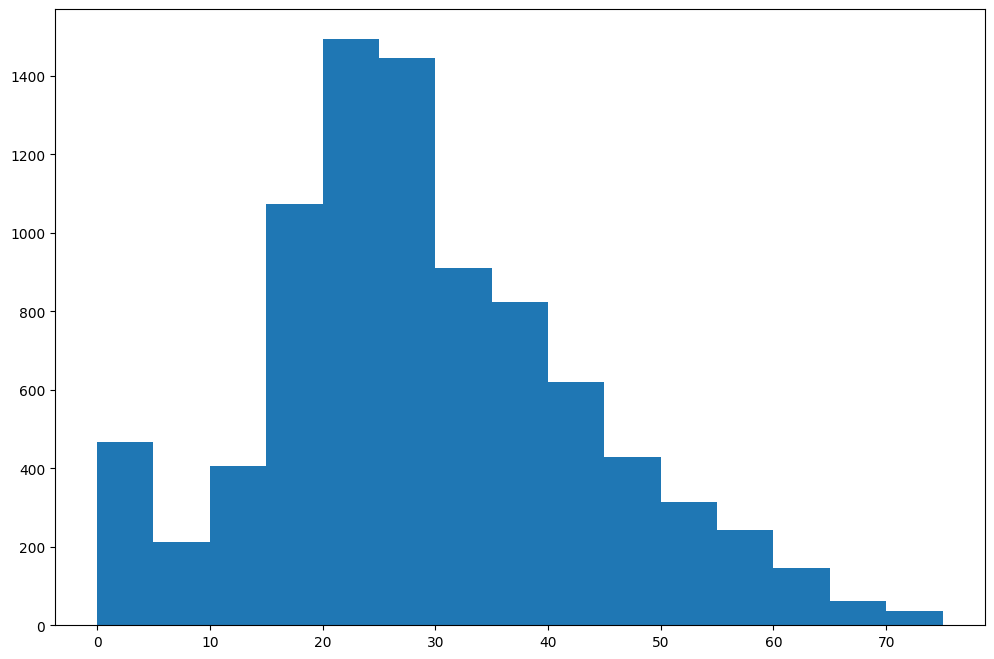

In [58]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Age'], bins=np.arange(0,80,5));

In [59]:
raw_df['AgeGroup'] = pd.cut(raw_df['Age'],
                            bins=[-1,5,14,18,30,52,100],
                            labels=['Baby','Child','Teenager','Adult','OldAdult','Old'])

In [60]:
test_df['AgeGroup'] = pd.cut(test_df['Age'],
                            bins=[-1,5,14,18,30,52,100],
                            labels=['Baby','Child','Teenager','Adult','OldAdult','Old'])

In [61]:
view_categoricals_feature('AgeGroup')

,True,False
AgeGroup,,
Baby,75.751503,24.248497
Child,57.167235,42.832765
Teenager,53.846154,46.153846
Adult,47.000293,52.999707
OldAdult,47.791741,52.208259
Old,49.201278,50.798722


In [62]:
raw_df['CanHandle'] = raw_df['AgeGroup'].apply(lambda x: 1 if x in ['Baby', 'Child'] else 0)

In [63]:
test_df['CanHandle'] = test_df['AgeGroup'].apply(lambda x: 1 if x in ['Baby', 'Child'] else 0)

In [64]:
view_categoricals_feature('CanHandle')

,True,False
CanHandle,,
0,48.172976,51.827024
1,65.714286,34.285714


In [65]:
numeric_cols.append('Age')
categorical_cols += ['AgeGroup', 'CanHandle']

### Impute missing values

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
imputer = SimpleImputer()
imputer.fit(raw_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

SimpleImputer()

In [68]:
raw_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = imputer.transform(raw_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = imputer.transform(test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

### Interactive Features With Numeric Cols

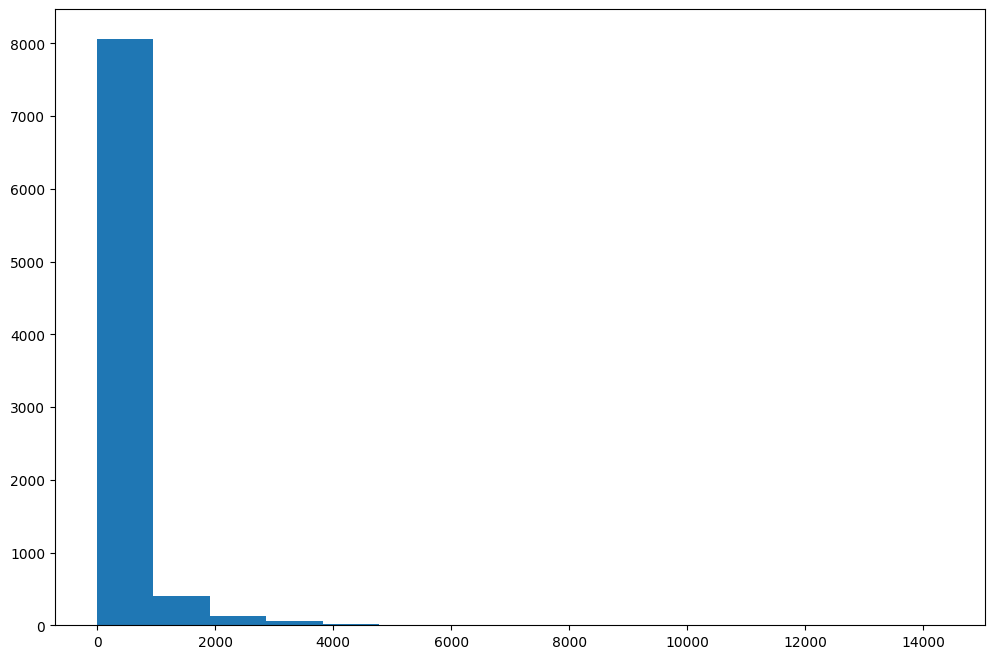

In [69]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['RoomService'], bins=15);

In [70]:
raw_df['RoomService'] = raw_df['RoomService'].apply(lambda x: x if x<4000 else 4200)

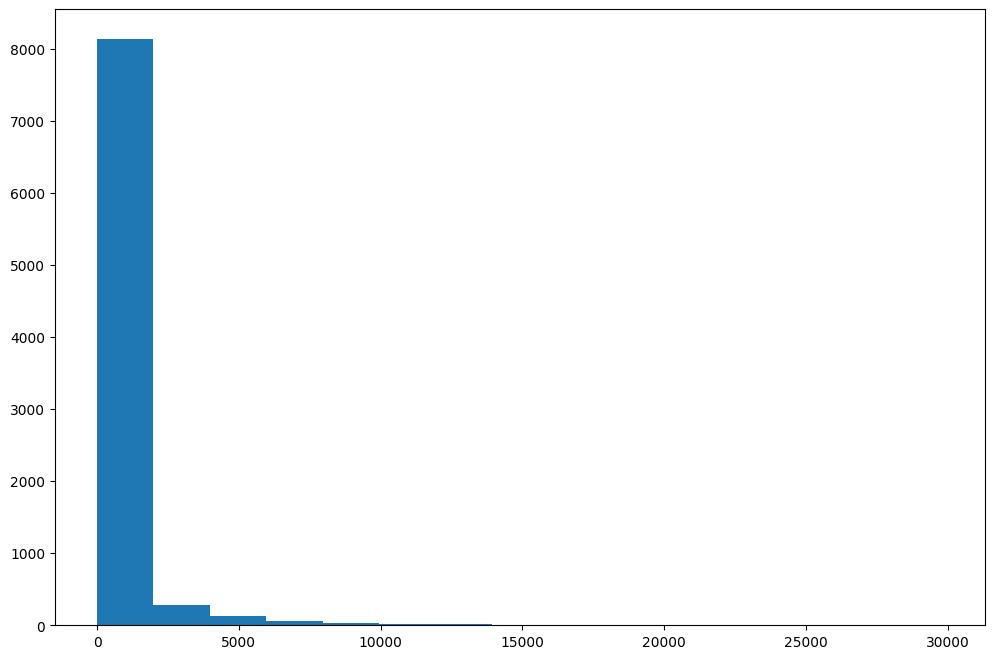

In [71]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['FoodCourt'], bins=15);

In [72]:
raw_df['FoodCourt'] = raw_df['FoodCourt'].apply(lambda x: x if x<11000 else 11000)

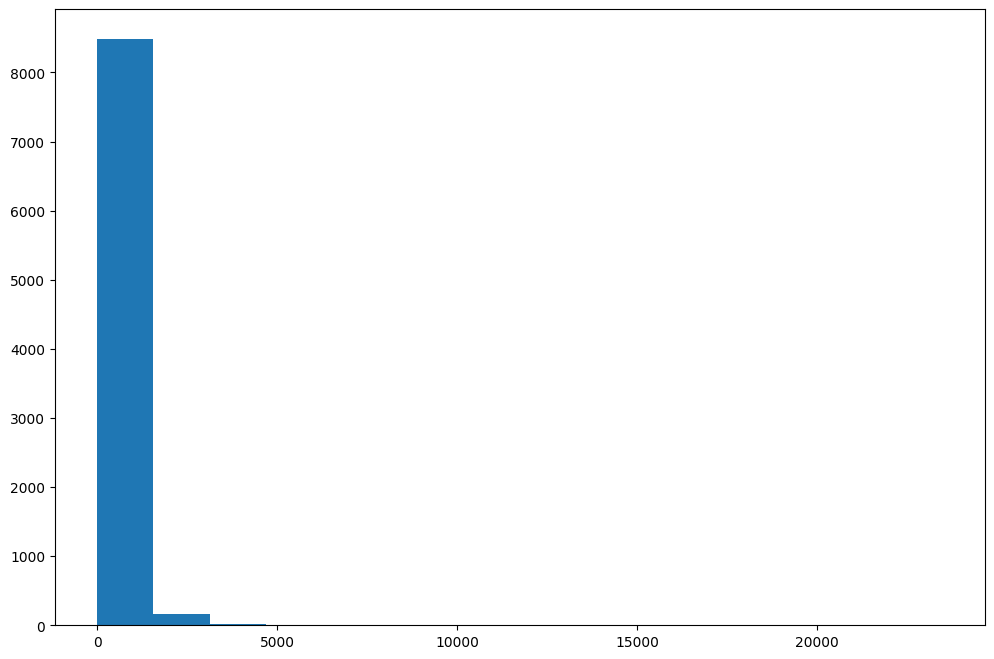

In [73]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['ShoppingMall'], bins=15);

In [74]:
raw_df['ShoppingMall'] = raw_df['ShoppingMall'].apply(lambda x: x if x<3000 else 3000)

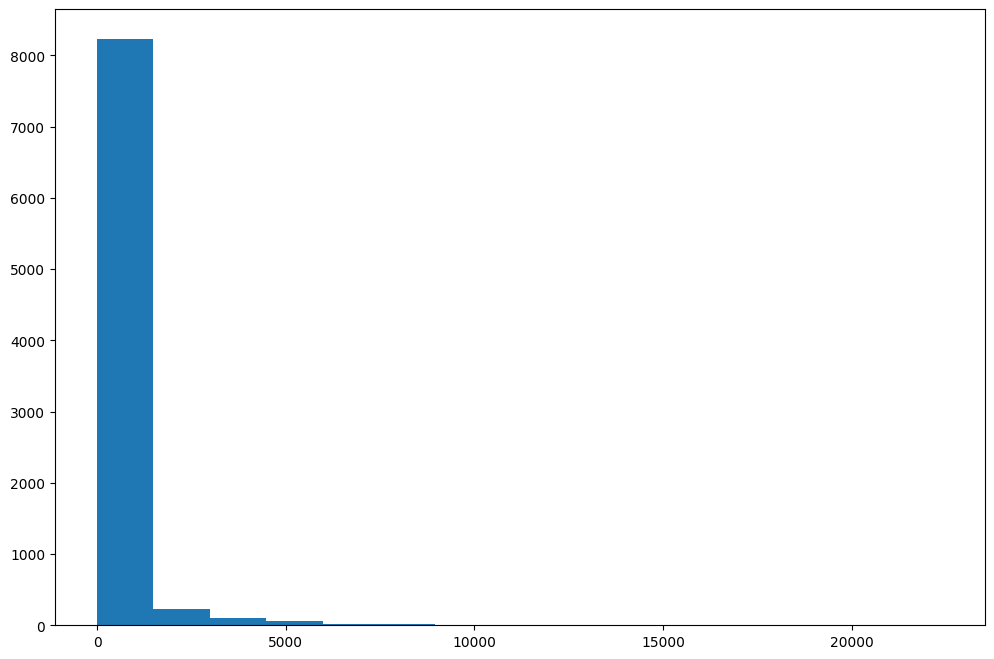

In [75]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['Spa'], bins=15);

In [76]:
raw_df['Spa'] = raw_df['Spa'].apply(lambda x: x if x<7500 else 8000)

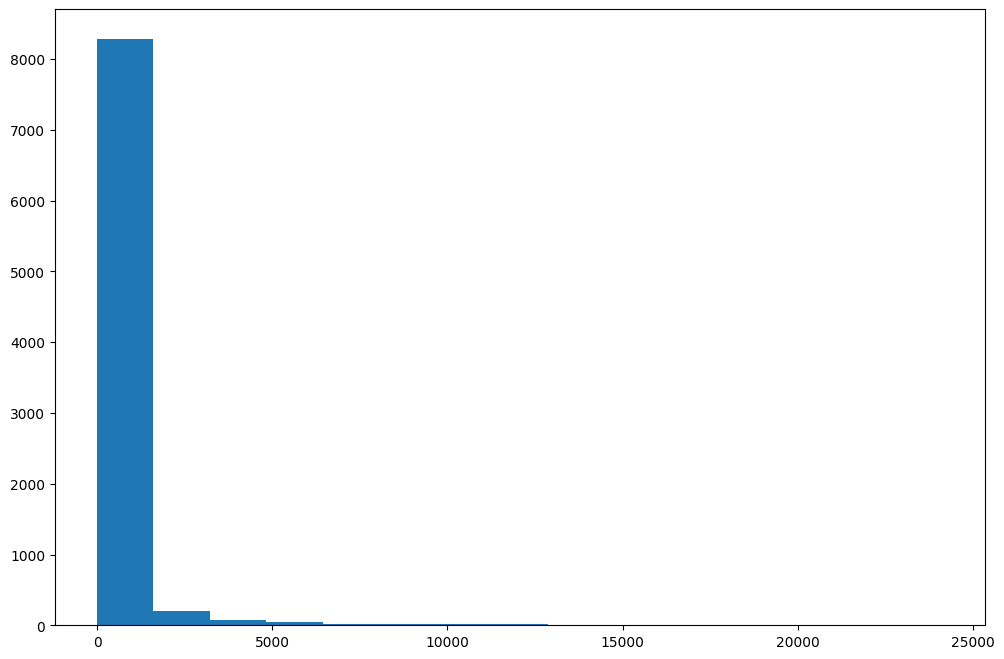

In [77]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['VRDeck'], bins=15);

In [78]:
raw_df['VRDeck'] = raw_df['VRDeck'].apply(lambda x: x if x<9000 else 10000)

In [79]:
raw_df['TotalPrice'] = raw_df['RoomService'] + raw_df['FoodCourt'] + raw_df['ShoppingMall'] + raw_df['Spa'] + raw_df['VRDeck']

In [80]:
test_df['TotalPrice'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

In [81]:
raw_df['JoinAmenity'] = raw_df['TotalPrice'].apply(lambda x: 1 if x>0 else 0)

In [82]:
test_df['JoinAmenity'] = test_df['TotalPrice'].apply(lambda x: 1 if x>0 else 0)

In [83]:
categorical_cols.append('JoinAmenity')

In [84]:
view_categoricals_feature('JoinAmenity')

,True,False
JoinAmenity,,
0,78.380043,21.619957
1,33.657730,66.342270


In [85]:
raw_df['TotalPrice'].describe()

count     8693.000000
mean      1402.053302
std       2437.624799
min          0.000000
25%          0.000000
50%        727.000000
75%       1461.000000
max      25240.000000
Name: TotalPrice, dtype: float64

In [86]:
(raw_df['TotalPrice'] > 20000).value_counts()

TotalPrice
False    8682
True       11
Name: count, dtype: int64

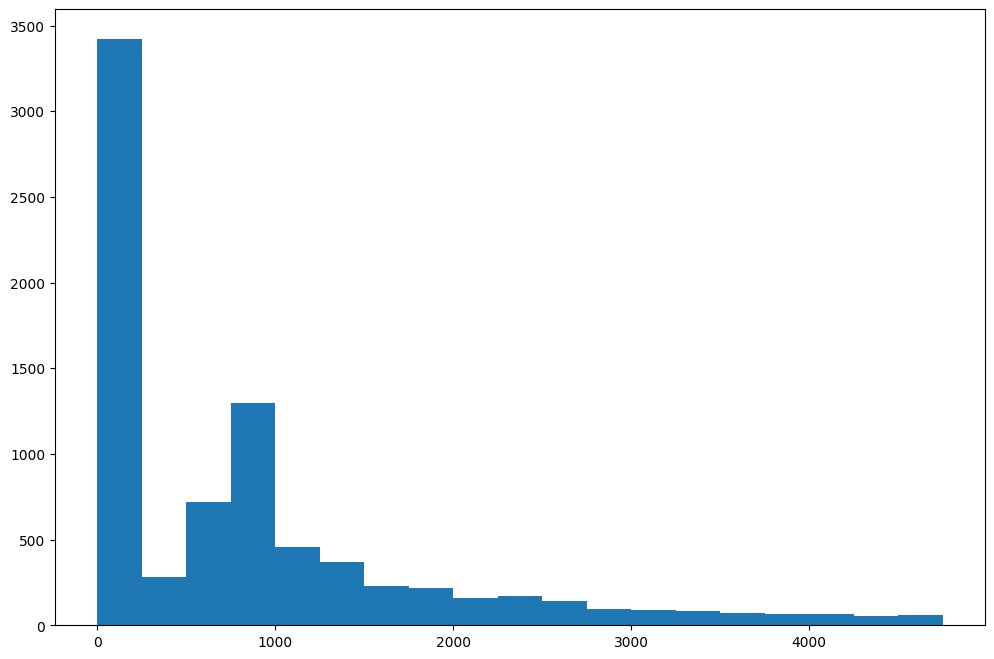

In [87]:
plt.figure(figsize=(12,8))
plt.hist(raw_df['TotalPrice'], bins=np.arange(0,5000,250));

In [88]:
def count_amenity(x):
    total = 0
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
        if x[col] > 0:
            total += 1
    return total

In [89]:
raw_df['TotalAmenity'] = raw_df.apply(count_amenity, axis=1)

In [90]:
test_df['TotalAmenity'] = test_df.apply(count_amenity, axis=1)

In [91]:
numeric_cols.append('TotalAmenity')

In [92]:
view_categoricals_feature('TotalAmenity')

,True,False
TotalAmenity,,
0,78.380043,21.619957
1,64.765101,35.234899
2,31.384892,68.615108
3,30.724356,69.275644
4,27.372263,72.627737
5,29.260450,70.739550


In [93]:
def split_price(x):
    if x==0:
        return 'No'
    if x<=1000:
        return 'Low'
    if x<=4000:
        return 'High'
    return 'VeryHigh'

In [94]:
raw_df['TypePrice'] = raw_df['TotalPrice'].apply(lambda x: split_price(x))

In [95]:
raw_df['TypePrice'].value_counts()

TypePrice
No          3247
Low         2481
High        2141
VeryHigh     824
Name: count, dtype: int64

In [96]:
test_df['TypePrice'] = test_df['TotalPrice'].apply(lambda x: split_price(x))

In [97]:
categorical_cols.append('TypePrice')

In [98]:
numeric_cols += ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalPrice']

### Scale

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
raw_df[numeric_cols].describe()

,Age,TotalAmenity,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalPrice
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,1.843552,215.227592,436.461536,159.866751,294.267157,296.230266,1402.053302
std,14.339054,1.651508,568.035297,1371.766647,426.200772,945.418879,1027.249514,2437.624799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,727.000000
75%,37.000000,3.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1461.000000
max,79.000000,5.000000,4200.000000,11000.000000,3000.000000,8000.000000,10000.000000,25240.000000


In [101]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [102]:
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])
raw_df[numeric_cols].describe()

,Age,TotalAmenity,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalPrice
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.364911,0.368710,0.051245,0.039678,0.053289,0.036783,0.029623,0.055549
std,0.181507,0.330302,0.135246,0.124706,0.142067,0.118177,0.102725,0.096578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028803
75%,0.468354,0.600000,0.018571,0.010727,0.015000,0.011125,0.007100,0.057884
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

### Encode

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [106]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
len(encoded_cols)

44

In [107]:
encoded_df = pd.DataFrame(data=encoder.transform(raw_df[categorical_cols]), columns=encoded_cols)
encoded_df.index = raw_df.index
raw_df = pd.concat([raw_df, encoded_df], axis=1).copy()

In [108]:
encoded_df = pd.DataFrame(data=encoder.transform(test_df[categorical_cols]), columns=encoded_cols)
encoded_df.index = test_df.index
test_df = pd.concat([test_df, encoded_df], axis=1).copy()

In [109]:
inputs = raw_df[numeric_cols+encoded_cols]
test_inputs = test_df[numeric_cols+encoded_cols]

In [110]:
targets = raw_df['Transported']

In [111]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets,
                                                                        test_size=0.2,
                                                                        random_state=42)

## Model and training model

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [113]:
classifier = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'XGB': XGBClassifier(n_jobs=-1),
    'LGBM' : LGBMClassifier(n_jobs=-1)
}
result = {'Classifier': [], 'Accurary': []}

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
for clf_name, clf in classifier.items():
    clf.fit(train_inputs, train_targets)
    preds = clf.predict(val_inputs)
    acc = accuracy_score(val_targets, preds)
    result['Classifier'].append(clf_name)
    result['Accurary'].append(acc)
result_df = pd.DataFrame(result)
result_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1701
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


,Classifier,Accurary
0,LogisticRegression,0.782634
1,DecisionTree,0.735480
2,RandomForest,0.785509
3,XGB,0.791259
4,LGBM,0.790109


In [118]:
rf = RandomForestClassifier()
rf.fit(train_inputs, train_targets)

RandomForestClassifier()

In [119]:
rf.feature_importances_

array([1.19587251e-01, 5.51403484e-02, 6.03062299e-02, 7.24767501e-02,
       6.13547989e-02, 7.11639009e-02, 6.01668422e-02, 8.98962207e-02,
       2.07438060e-02, 1.32512227e-02, 8.10157650e-03, 3.40394060e-02,
       4.09221550e-02, 3.69847303e-03, 5.96057067e-03, 2.74397944e-03,
       1.42142195e-02, 1.36425607e-02, 1.59904075e-02, 4.02680814e-05,
       1.36464062e-02, 1.35940117e-02, 2.79779648e-03, 1.06622913e-02,
       7.17628313e-03, 1.20181234e-02, 1.19199527e-03, 1.35781766e-03,
       6.27456226e-03, 8.83958035e-03, 7.94816574e-03, 4.96592101e-03,
       4.74220541e-03, 3.69913363e-03, 4.58206662e-03, 3.06464033e-03,
       6.20083220e-03, 6.57553254e-03, 1.02756723e-02, 3.64777540e-03,
       3.40456233e-03, 5.19157394e-03, 8.40568504e-03, 5.32620851e-03,
       3.51873804e-03, 3.07324572e-03, 2.77197265e-02, 2.22136997e-02,
       7.76864341e-03, 5.87404023e-03, 8.17925289e-03, 2.62282391e-03])

In [120]:
feature_importance_map = {}
name = rf.feature_names_in_
importance = rf.feature_importances_
for i in range(len(name)):
    feature_importance_map[name[i]] = importance[i]

In [121]:
def test_importance(threshold: float):
    importance_features = []
    for name, importance in feature_importance_map.items():
        if importance >= threshold:
            importance_features.append(name)
    rf = RandomForestClassifier()
    rf.fit(train_inputs[importance_features], train_targets)
    return rf.score(val_inputs[importance_features], val_targets), importance_features

In [126]:
score, importance_features = test_importance(0.001)
score

0.78953421506613

In [127]:
classifier = {
    'RF': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    'LGBM': LGBMClassifier()
}
result = {'Classifier': [], 'Accuracy': []}

In [128]:
for clf_name, clf in classifier.items():
    clf.fit(train_inputs[importance_features], train_targets)
    acc = clf.score(val_inputs[importance_features], val_targets)
    result['Classifier'].append(clf_name)
    result['Accuracy'].append(acc)
result_df = pd.DataFrame(result)
result_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1701
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


,Classifier,Accuracy
0,RF,0.785509
1,XGB,0.791259
2,LGBM,0.790109


In [129]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=200,
                                  random_state=42, max_depth=12,
                                  max_features='log2', criterion='entropy',
                                  min_samples_split=11, min_samples_leaf=1,
                                  max_leaf_nodes=97, class_weight={0: 1, 1: 1.1})

In [130]:
rf_model.fit(train_inputs[importance_features], train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.1}, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=97,
                       min_samples_split=11, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [131]:
rf_model.score(val_inputs[importance_features], val_targets)

0.7918343875790684

In [132]:
preds = rf_model.predict(test_inputs[importance_features])
preds

array([ True, False,  True, ...,  True,  True,  True])

In [133]:
sample_sub_df['Transported'] = preds
sample_sub_df.to_csv('data/sub1.csv', index=None)

In [134]:
xgb_model = XGBClassifier()

In [135]:
xgb_model.fit(train_inputs[importance_features], train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
xgb_model.score(val_inputs[importance_features], val_targets)

0.7912593444508338

In [139]:
preds = xgb_model.predict(test_inputs[importance_features])
preds = pd.Series(preds).map(lambda x: True if x==1 else False)
sample_sub_df['Transported'] = preds
sample_sub_df.to_csv('data/sub2.csv', index=None)